<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/Porto_Seguro's_Sage_Driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 참고 사이트
https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d

https://soohee410.github.io/colab_kaggle


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brandnewmin","key":"bd759217c3162780a8df59d59aa4688e"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

401 - Unauthorized


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle competitions download -c porto-seguro-safe-driver-prediction

401 - Unauthorized


In [ ]:
!ls

kaggle.json  porto-seguro-safe-driver-prediction.zip  sample_data


In [ ]:
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip

Archive:  porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

kaggle.json				 sample_data		test.csv
porto-seguro-safe-driver-prediction.zip  sample_submission.csv	train.csv


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/.kaggle/'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/.kaggle

/content/drive/My Drive/.kaggle


In [ ]:
#! kaggle competitions download -c porto-seguro-safe-driver-prediction #401 - Unauthorized (위에랑 결과 상이) 여튼 뒤에 문제없이 출력됐음

In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip

Archive:  porto-seguro-safe-driver-prediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# kernel one

## kernel one

## first.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer #: error _why?
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv('/content/drive/My Drive/.kaggle/train.csv')

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
test = pd.read_csv('/content/drive/My Drive/.kaggle/test.csv')

In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [ ]:
train.shape

(595212, 59)

In [ ]:
train.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [ ]:
train.drop_duplicates()
train.shape

(595212, 59)

In [ ]:
test.shape

(892816, 58)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
#metadata <이게 뭐야?>

data = []
#원래 column에서 target, input, id에 각각 해당하는 feature 설정
for f in train.columns : #f는 사용자 정의인가? 응
  if f == 'target': #f = 'target'(feature 중 하나 / 2nd column)
    role = 'target' #role? role이란 새로운 변수에 target 값 부여
  elif f == 'id':
    role = 'id' 
  else : #나머지 칼럼에 대해서는 input 값 부여
    role = 'input'

#문장 자체는 알겠는데 뭘 하고자 이러는거야?
#위 if 구문으로 target, id, input을 지정하고 다음으로 if 구문을 실행하는거지? 순차적인 실행을 전제 하고 이렇게 쓴 거겠지?
  if 'bin' in f or f == 'target': #bin in f : 칼럼 중에 bin이 들어간 모든 feature를 말하나?
    level = 'binary'
  elif 'cat' in f or f == 'id':
    level = 'nominal'
  elif train[f].dtype == float:
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'
  
  keep = True
  if f == 'id':
    keep = False
  
  dtype = train[f].dtype

  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype': dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data,columns = ['varname', 'role','level','keep','dytpe'])
meta.set_index('varname',inplace=True)

In [ ]:
meta

,role,level,keep,dytpe
varname,,,,
id,id,nominal,False,NaN
target,target,binary,True,NaN
ps_ind_01,input,ordinal,True,NaN
ps_ind_02_cat,input,nominal,True,NaN
ps_ind_03,input,ordinal,True,NaN
ps_ind_04_cat,input,nominal,True,NaN
ps_ind_05_cat,input,nominal,True,NaN
ps_ind_06_bin,input,binary,True,NaN
ps_ind_07_bin,input,binary,True,NaN


In [ ]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
pd.DataFrame({'count' : meta.groupby(['role','level'])['role'].size()}).reset_index()
#groupby , dictionary 처음봐 / .size / .reset_index

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index #?
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
desired_apriori = 0.10 #why 0.1로 지정?

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target =0 : {}'.format(undersampling_rate))
print('Number of records with target =0 after undersampling : {}'.format(undersampled_nb_0))

Rate to undersample records with target =0 : 0.34043569687437886
Number of records with target =0 after undersampling : 195246


In [ ]:
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)
idx_list = list(undersampled_idx) + list(idx_1)
train = train.loc[idx_list].reset_index(drop=True)

## Data Quality checks
checking missing values

In [ ]:
vars_with_missing = []
for f in train.columns:
  missings = train[train[f] == -1][f].count()
  #train[f] == -1 : 
  #
  if missings > 0:
    vars_with_missing.append(f) 
    missings_perc = missings/train.shape[0]

    print('Variabel {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variabel ps_ind_02_cat has 103 records (0.05%) with missing values
Variabel ps_ind_04_cat has 51 records (0.02%) with missing values
Variabel ps_ind_05_cat has 2256 records (1.04%) with missing values
Variabel ps_reg_03 has 38580 records (17.78%) with missing values
Variabel ps_car_01_cat has 62 records (0.03%) with missing values
Variabel ps_car_02_cat has 2 records (0.00%) with missing values
Variabel ps_car_03_cat has 148367 records (68.39%) with missing values
Variabel ps_car_05_cat has 96026 records (44.26%) with missing values
Variabel ps_car_07_cat has 4431 records (2.04%) with missing values
Variabel ps_car_09_cat has 230 records (0.11%) with missing values
Variabel ps_car_11 has 1 records (0.00%) with missing values
Variabel ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [ ]:
print(vars_with_missing)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_14']


In [ ]:
#train[train['ps_ind_02_cat'] == -1]

In [ ]:
# vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
# train.drop(vars_to_drop, inplace=True, axis=1) #column 중에 car_03 car_05 drop
# meta.loc[(vars_to_drop), 'keep'] = False

In [ ]:
mean_imp = SimpleImputer(missing_values = -1, strategy='mean')
mode_imp = SimpleImputer(missing_values = -1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

In [ ]:

# #Imputer(sklearn.preprocessing)
# #missing_values=-1 : 결측치가 -1로 채워져있는 상태다.
# #strategy = 값으로 결측치를 대체 (-1을 strategy값으로 대체하라는건가?)
# #axis = 0,1 방향설정 : 무슨 방향?

# train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
# train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
# train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
# #변수 선택 이유 :
# #ravel : 평평하게 배열?
# #fit_transform : 정규화
# train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v: #f 가 어떤 정의 없어도 그저 v에 대응하는? 그런 개념인게 맞나? for 문이 약해
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [ ]:
def add_noise(series, noise_level):
  return series * (1+noise_level * np.random.randn(len(series)))

  def target_encode(trn_series=None,
                    tst_series=None,
                    target=None,
                    min_samples_leaf=1,
                    smoothing=1,
                    noise_level=0):
    assert len(tran_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    averages = temp.groupby(by=tran_series.name)[target.name].agg(['mean','count'])
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_smaples_leaf)/smoothing))

    prior = target.mean()
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean','count'], axis=1, inplace=True)

    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_fram(tst_series.name),
        averages.reset_index().rename(columns ={'index':target.name, target.name : 'average'}),
        on=tst_series.name,
        how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
    #들여쓰기의 중요성

In [ ]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                   test['ps_car_11_cat'],
                                   target = train.target,
                                    min_samples_leaf = 100,
                                    smoothing=10,
                                    noise_level=0.01)
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

NameError: ignored

## Data Visualization

<Figure size 432x288 with 0 Axes>

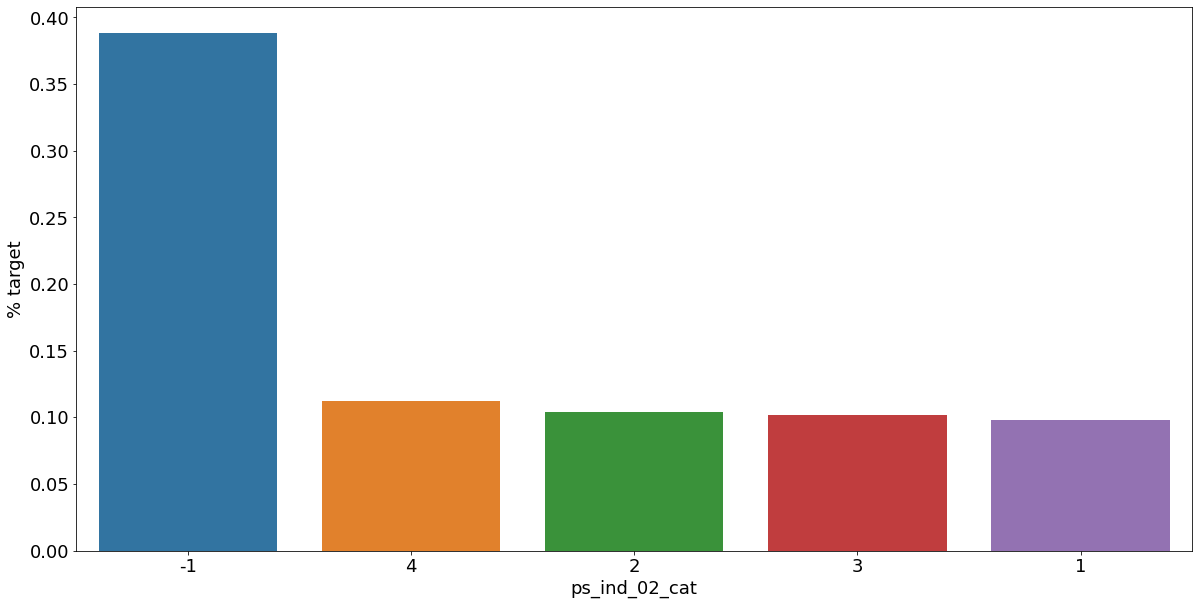

<Figure size 432x288 with 0 Axes>

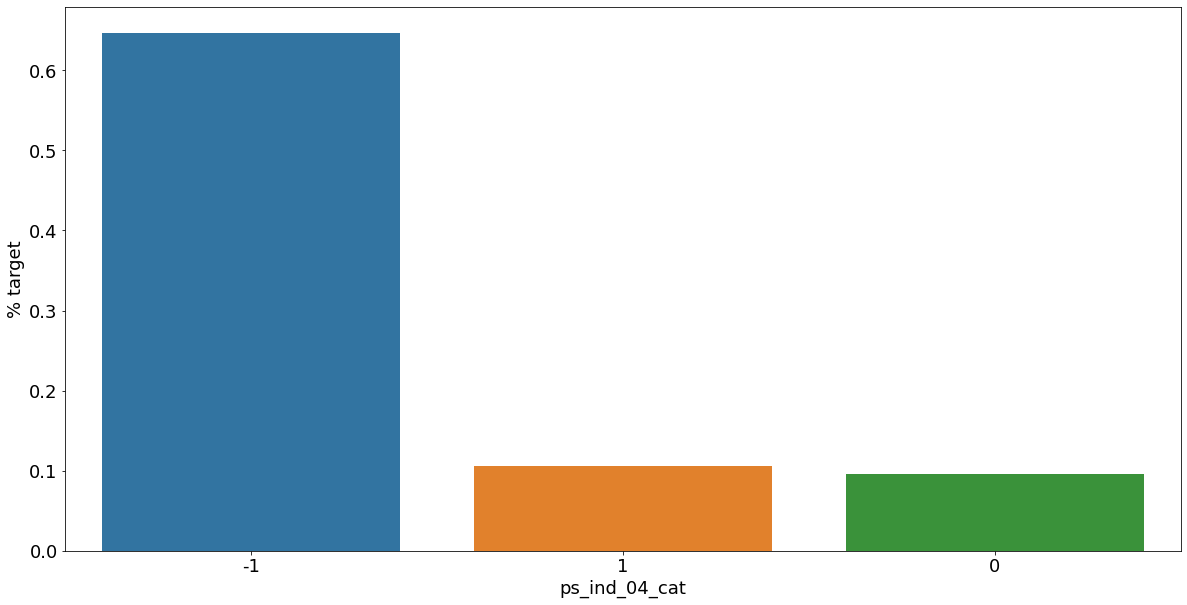

<Figure size 432x288 with 0 Axes>

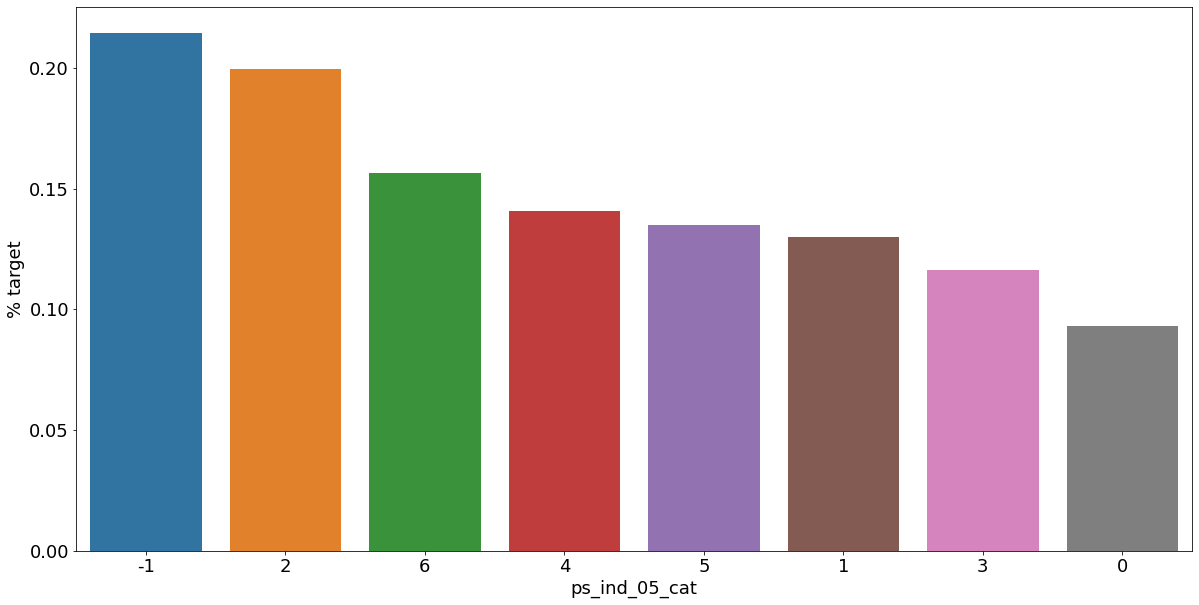

<Figure size 432x288 with 0 Axes>

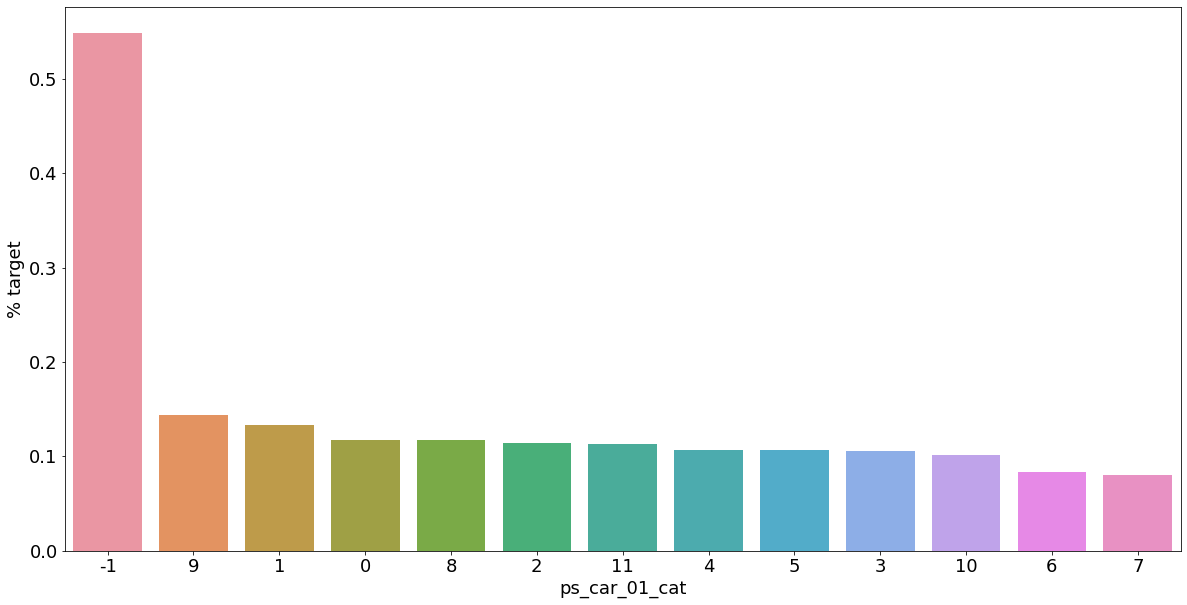

<Figure size 432x288 with 0 Axes>

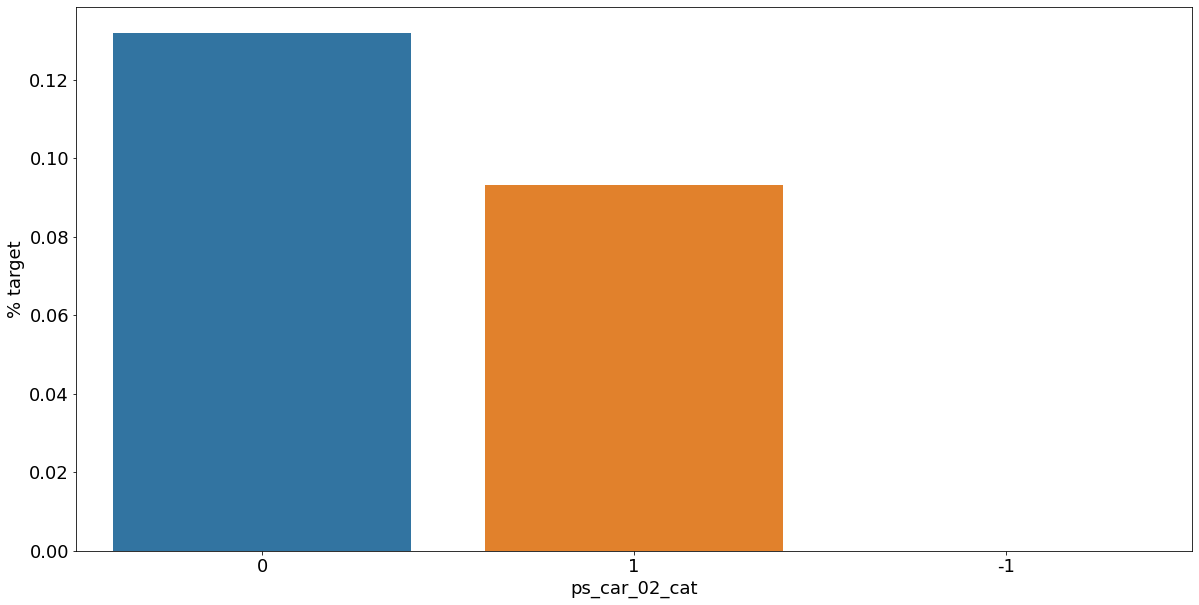

<Figure size 432x288 with 0 Axes>

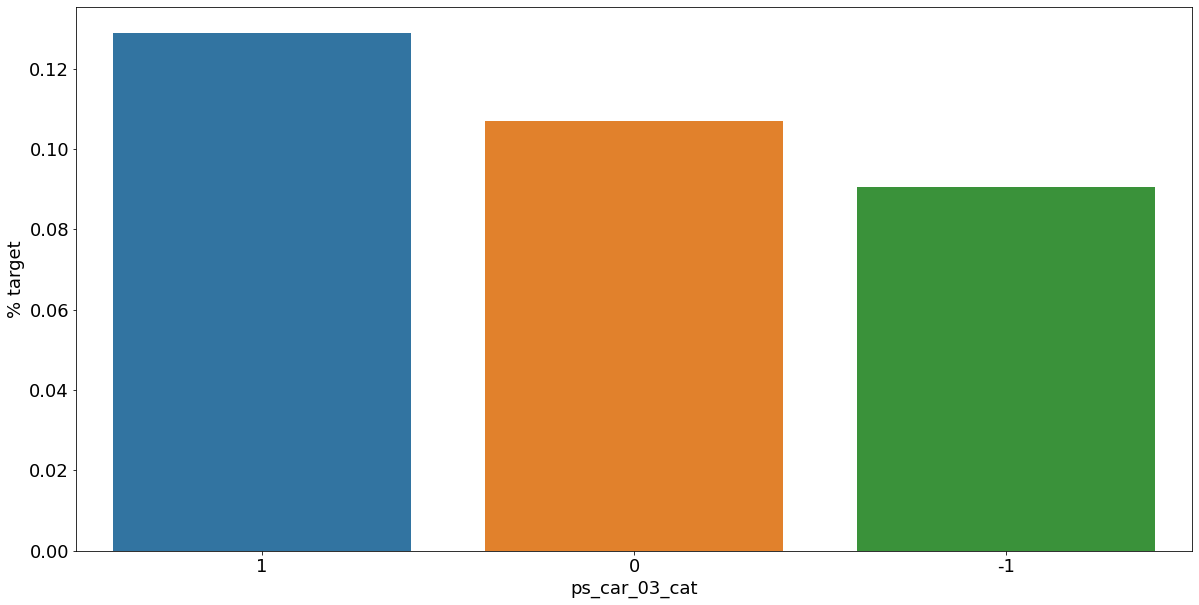

<Figure size 432x288 with 0 Axes>

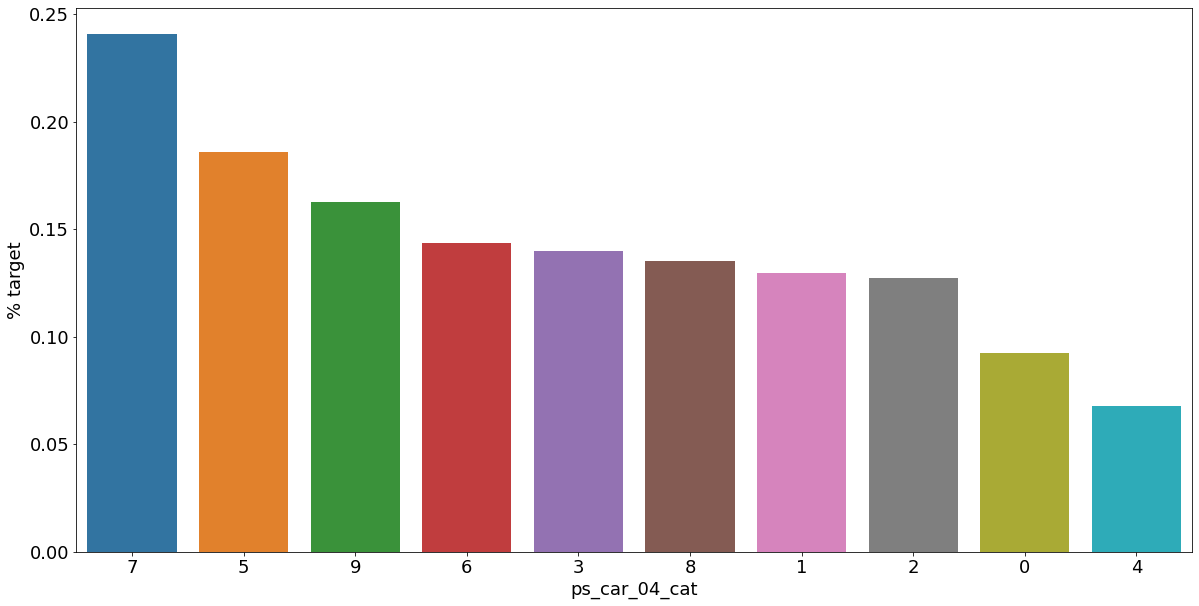

<Figure size 432x288 with 0 Axes>

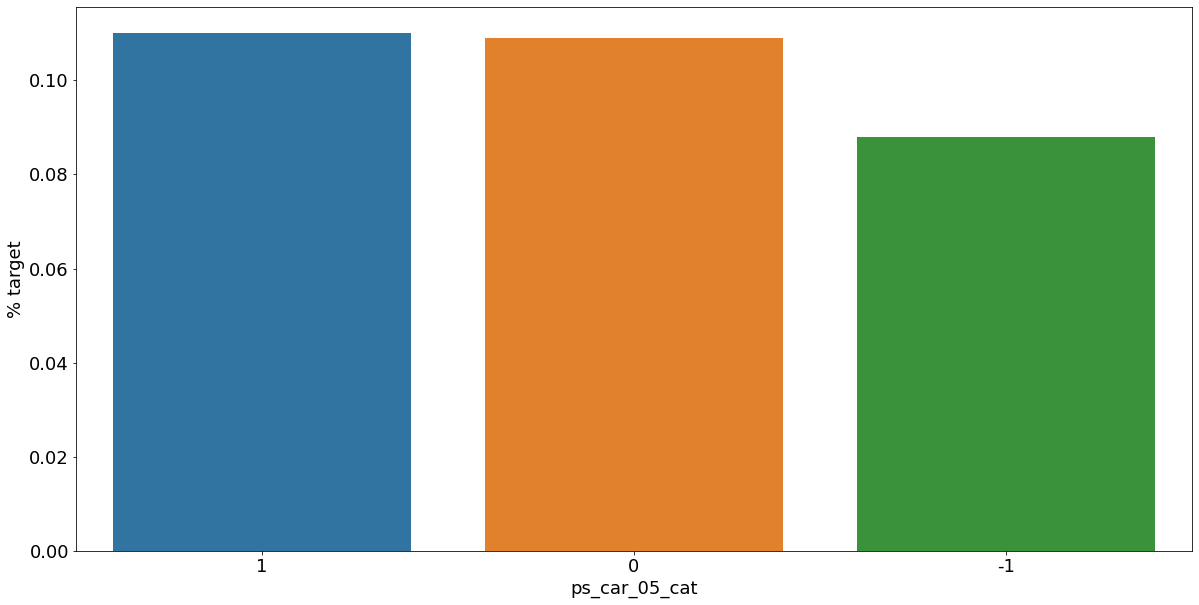

<Figure size 432x288 with 0 Axes>

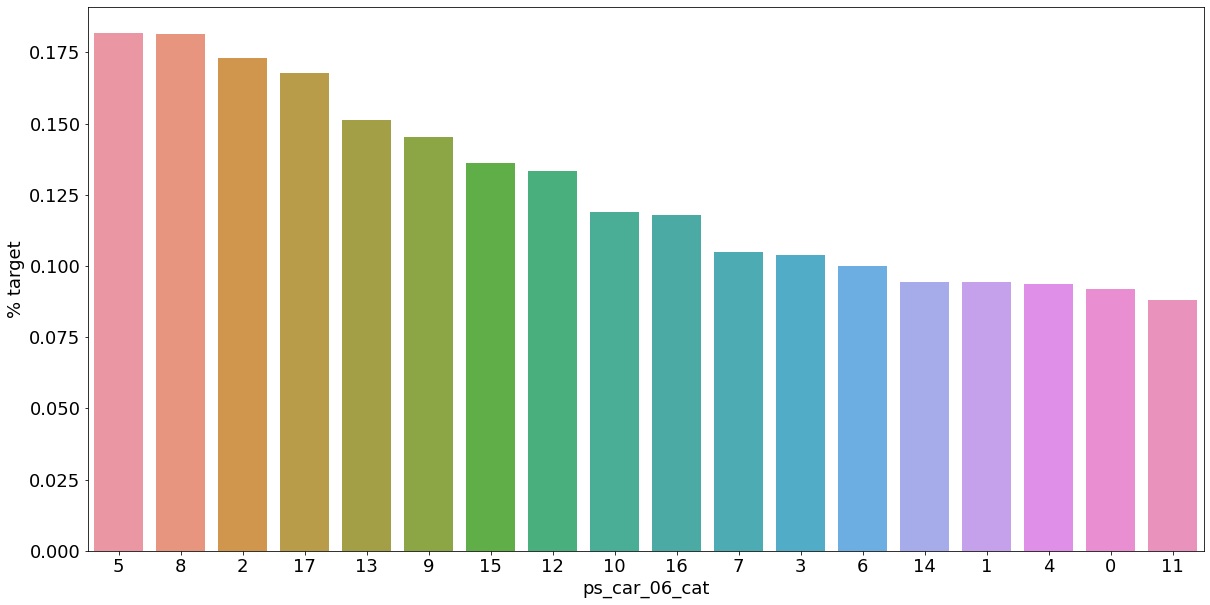

<Figure size 432x288 with 0 Axes>

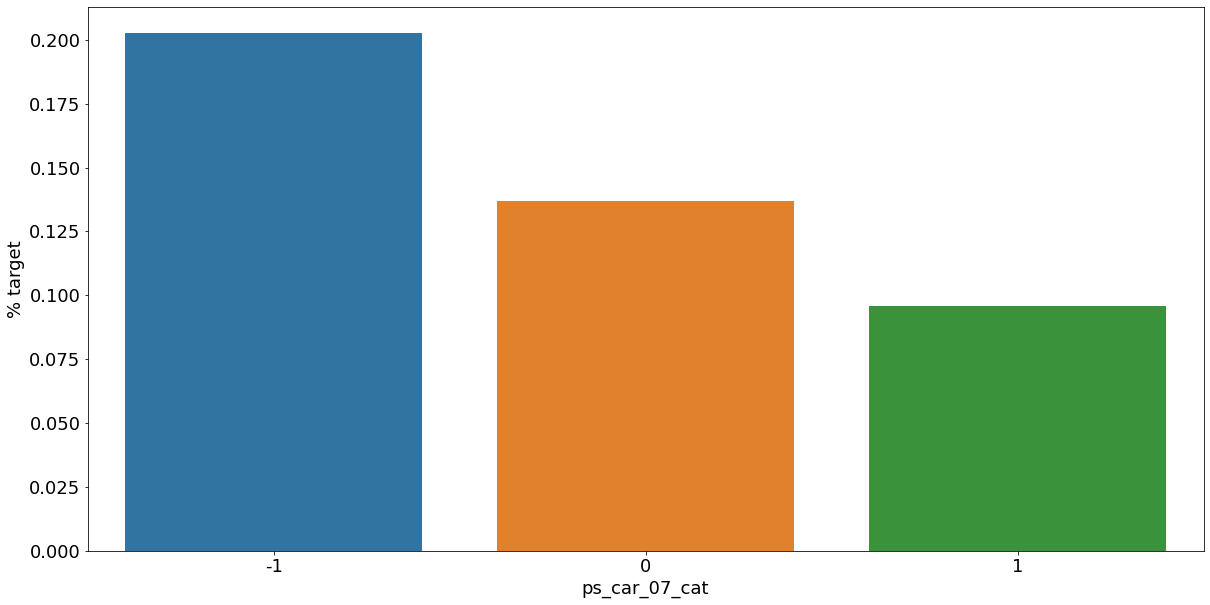

<Figure size 432x288 with 0 Axes>

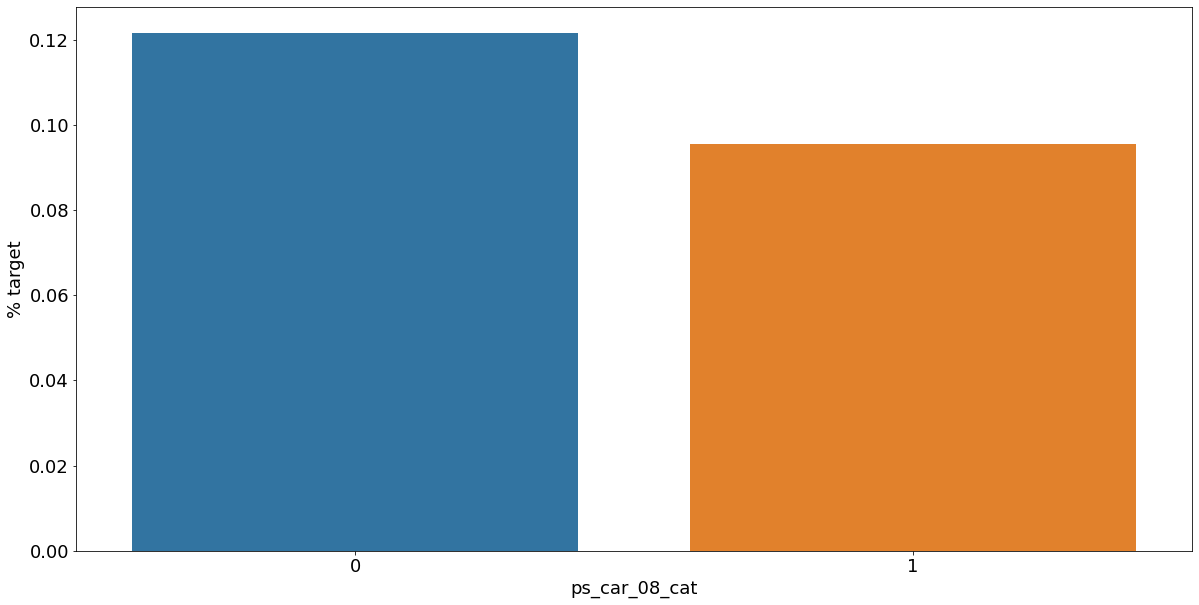

<Figure size 432x288 with 0 Axes>

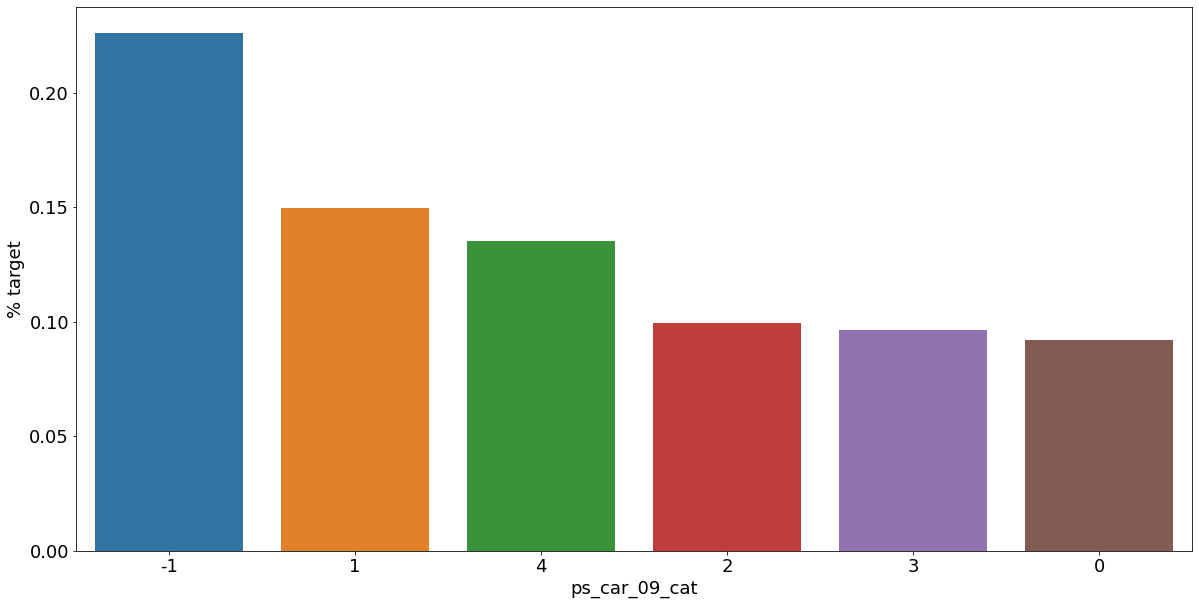

<Figure size 432x288 with 0 Axes>

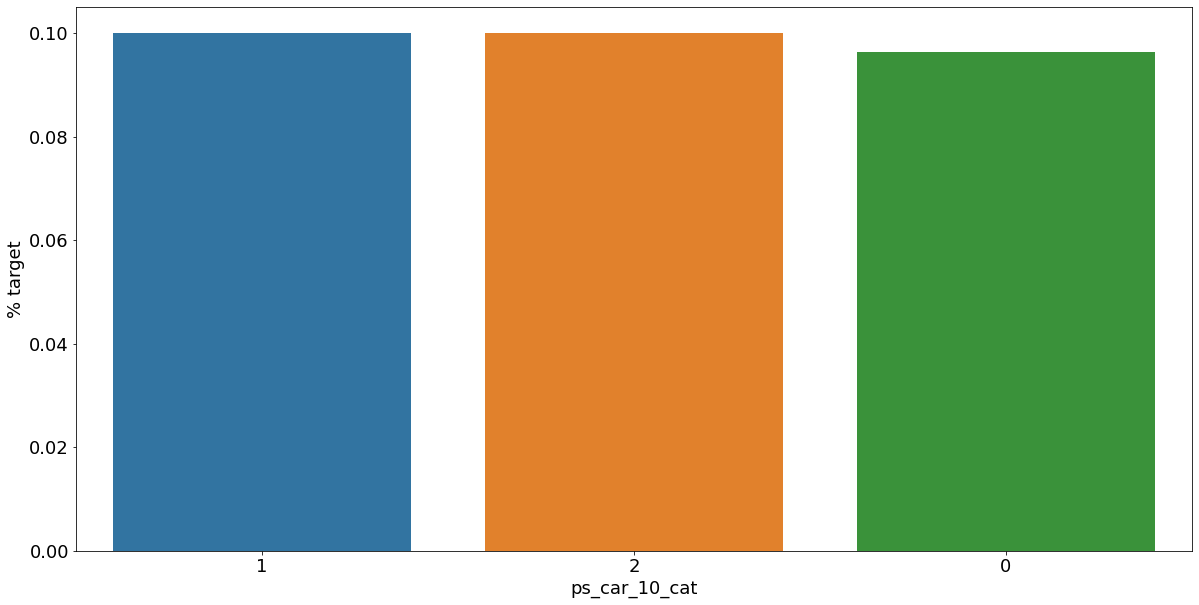

<Figure size 432x288 with 0 Axes>

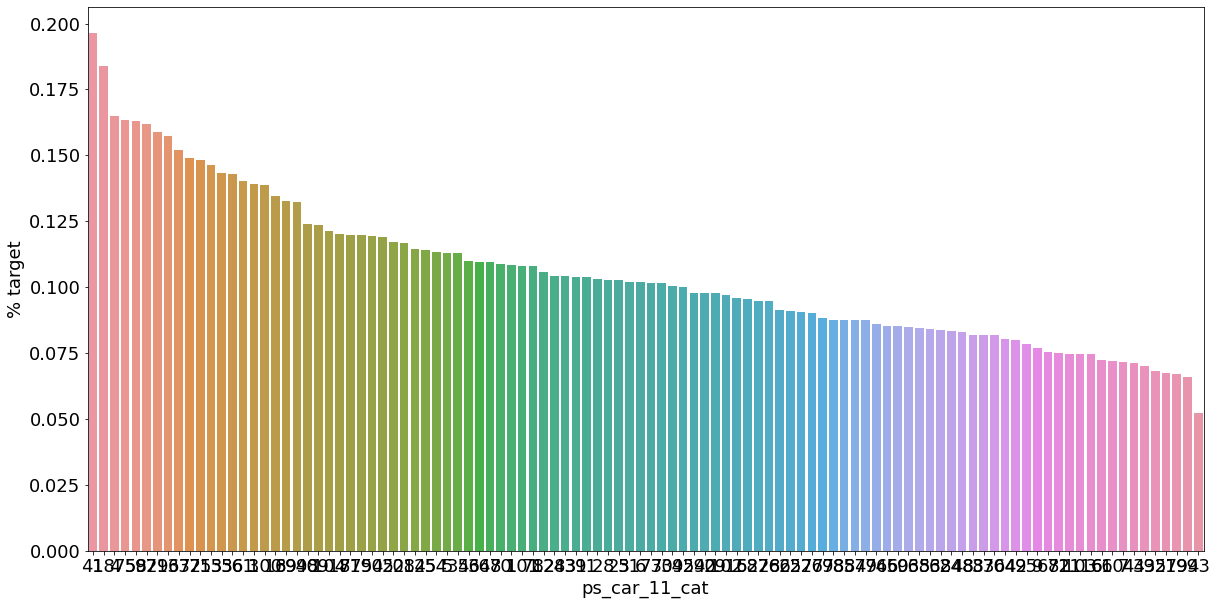

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  plt.figure()
  fig, ax = plt.subplots(figsize=(20,10))
  cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
  cat_perc.sort_values(by = 'target', ascending=False, inplace=True)

  sns.barplot(ax=ax, x=f, y='target',data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize = 18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

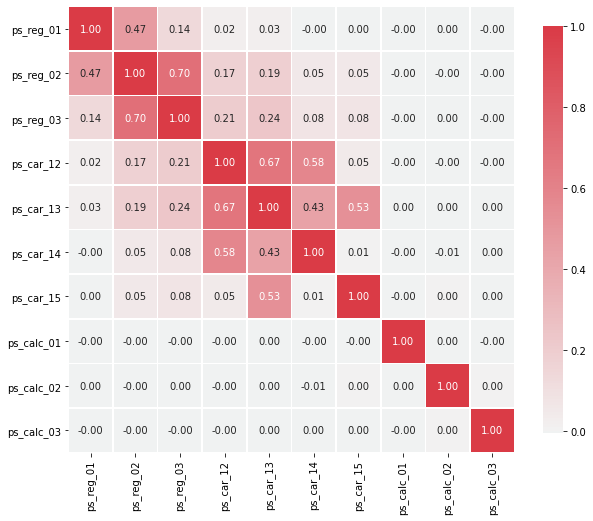

In [ ]:
def corr_heatmap(v):
  correlations = train[v].corr()

  cmap = sns.diverging_palette(220,10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap = cmap, vmax=1.0, center=0, fmt='.2f',
              square = True, linewidths = .5, annot=True, cbar_kws = {"shrink" : .75})
  plt.show()

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

In [ ]:
s = train.sample(frac=0.1)

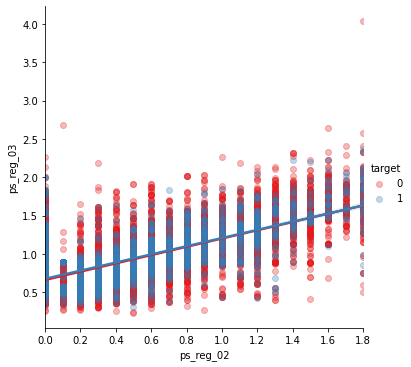

In [ ]:
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

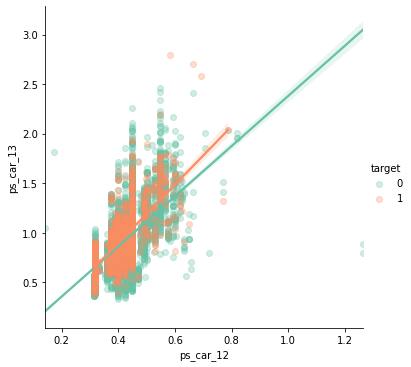

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set2', scatter_kws={'alpha':0.3})
plt.show()

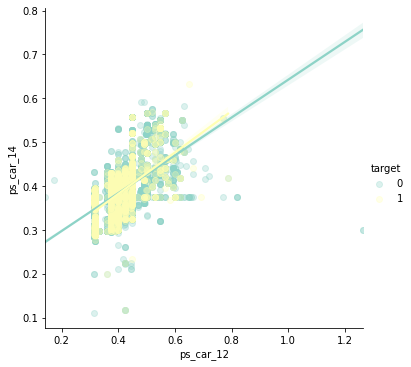

In [ ]:
sns.lmplot(x='ps_car_12',y='ps_car_14', data=s, hue='target', palette='Set3', scatter_kws = {'alpha':0.3})
plt.show()

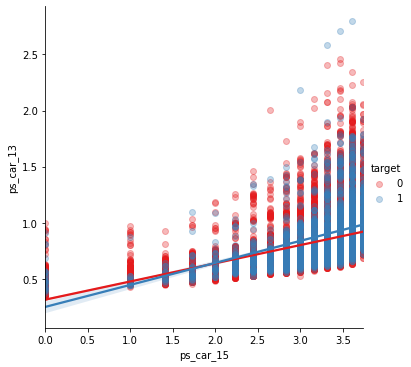

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13',data=s,hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

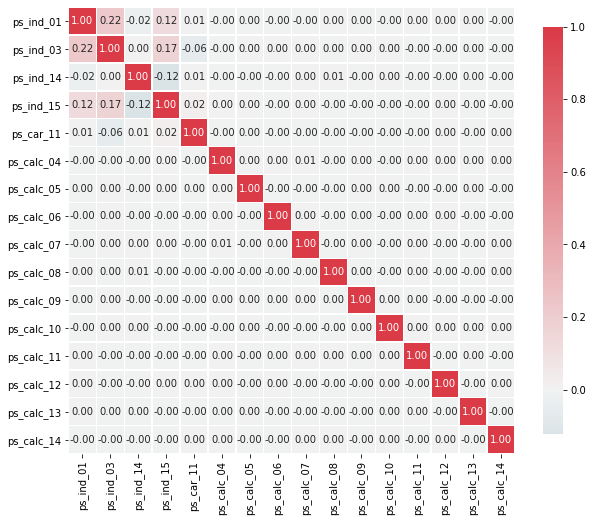

In [ ]:
v =meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## Feature Engineering

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Befor dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Befor dummification we have 59 variables in train
After dummification we have 215 variables in train


In [ ]:
#creating intercation variables
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
intercation = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
print('Befor creating interactions we have {} variablesom train'.format(train.shape[1]))
print('After creating interactions we have {} variables train'.format(train.shape[1]))

Befor creating interactions we have 215 variablesom train
After creating interactions we have 215 variables train


## Feature selection

In [ ]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'], axis=1))

f =np.vectorize(lambda x : not x)

v=train.drop(['id','target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

99 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_11_cat_2', 'ps_car_11_cat_3', 'ps_car_11_cat_4', 'ps_car_11_cat_6', 'ps_car_11_cat_7', 'ps_car_11_cat_8', 'ps_car_11_cat_9', 'ps_car_11_cat_13', 'ps_car_11_cat_14', 'ps_car_11_cat_15', 'ps_car_11_cat_17', 'ps_car_11_cat_18', 'ps_car_11_cat_19', 'ps_car_11_cat_20', 'ps_car_11_cat_21', 'ps_car_11_cat_23', 'ps_car_11_cat_24', 'ps_car_11_cat_25', 'ps_car_11_cat_26', 'ps_car_11_cat_29', 'ps_car_11_cat_30', 'ps_car_11_cat_31', 'ps_car_11_cat_33', 'ps_car_11_cat_34', 'ps_car_11_cat_35', 'ps_car_11_c

In [ ]:
X_train = train.drop(['id','target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf=RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.eature_importances_)[::-1]

for f in range(X_train.shape[1]) :
   print("%2d) %-%*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

KeyboardInterrupt: ignored

In [ ]:
sf m = SelcectFromModel(rf, threshold = 'midian', prefit=True)
print('Number of features befor shlection : {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Numbero of features after selection {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

SyntaxError: ignored

In [ ]:
train = train[selected_vars + ['target']]

## Feature sacling

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop['target'], axis=1)

# kernel four

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle #섞는다?
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
#데이터 전처리 방법
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#특성(feature) 자동 선택
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel #모델 기반 선택
#교차검증
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier #
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns',100)

#polynomialfeatures
구간 나누기는 연속형 특성을 확장하는 방법 중 하나. 원본 특성의 다항식을 추가하는 방법도 있다.
특성 x가 주어지면 x^2 x^3 등을 시도해볼 수 있다.
#standardscaler
각 특성의 평균 0, 분산 1로 변경해 모든 특성이 같은 크기를 가지게 한다. 특성의 최솟값과 최댓값의 크기를 제한하지 않는다
#selectfrommodel
(지도학슴모델로 계산된) 중요도가 지정된 임계치보다 큰 모든 특성을 선택한다.
#stratifiedkfold(계층별 k겹 교차 검증)
계층별 교차 검증에서는 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눈다
#xgboost
대용량 분산 처리를 위한 그레이디언트 부스팅 오픈소스 라이브러리

In [5]:
trainset = pd.read_csv('/content/drive/My Drive/.kaggle/train.csv')

In [6]:
testset= pd.read_csv('/content/drive/My Drive/.kaggle/test.csv')

In [7]:
trainset.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [8]:
print("Train dataset (rows, cols) : ", trainset.shape, "\nTest dataset (rows, cols) : ", testset.shape)

Train dataset (rows, cols) :  (595212, 59) 
Test dataset (rows, cols) :  (892816, 58)


In [9]:
print("Columns in train and not in test dataset :", set(trainset.columns) - set(testset.columns))

Columns in train and not in test dataset : {'target'}


In [10]:
data = [] #새 데이터 프레임을 만들기 전에 리스트 형태로 밑밥깔기
for feature in trainset.columns:
  if feature == 'target':
    use = 'target'
  elif feature == 'id':
    use = 'id'
  else :
    use = 'input'

  if 'bin' in feature or feature == 'target':
    type = 'binary'
  elif 'cat' in feature or feature == 'id':
    type = 'categorical'
  elif trainset[feature].dtype == float or isinstance(trainset[feature].dtype, float): #ininstance -> float 일치하는지 확인
    type = 'real'
  elif trainset[feature].dtype == int:
    type = 'integer'


  preserve = True
  if feature == 'id':
    preserve = False
  
  dtype = trainset[feature].dtype

  category = 'none'
  if 'ind' in feature :
    category = 'individual'
  elif 'reg' in feature:
    category = 'registration'
  elif 'car' in feature:
    category = 'car'
  elif 'calc' in feature :
    category = 'calculated'

  feature_dictionary = {
      'varname' : feature,
      'use' : use,
      'type' : type,
      'preserve' : preserve,
      'dtype' : dtype,
      'category' : category
  } #딕셔너리> ''안에 있는 명칭은 그대로 쓰고, feature / use / type 등등은 명칭 그대로 쓰는게 아님(저 자리라서가 아니라 ''가 아니라, 정의된 이름?)
  data.append(feature_dictionary)

metadata = pd.DataFrame(data, columns = ['varname', 'use', 'type','preserve', 'dtype', 'category'])
metadata.set_index('varname', inplace=True) #groupby와 같은 느낌
metadata

,use,type,preserve,dtype,category
varname,,,,,
id,id,categorical,False,int64,none
target,target,binary,True,int64,none
ps_ind_01,input,integer,True,int64,individual
ps_ind_02_cat,input,categorical,True,int64,individual
ps_ind_03,input,integer,True,int64,individual
ps_ind_04_cat,input,categorical,True,int64,individual
ps_ind_05_cat,input,categorical,True,int64,individual
ps_ind_06_bin,input,binary,True,int64,individual
ps_ind_07_bin,input,binary,True,int64,individual


In [11]:
#지난 데이터셋과는 다른 작업이네요.
#왜 있을까?

In [12]:
metadata[(metadata.type == 'categorical') & (metadata.preserve)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [13]:
pd.DataFrame({'count' : metadata.groupby(['category'])['category'].size()}).reset_index()

,category,count
0,calculated,20
1,car,16
2,individual,18
3,none,2
4,registration,3


In [14]:
pd.DataFrame({'count' : metadata.groupby(['use', 'type'])['use'].size()}).reset_index()

,use,type,count
0,id,categorical,1
1,input,binary,17
2,input,categorical,14
3,input,integer,16
4,input,real,10
5,target,binary,1


## Data analysis and statistics
# Target variable

<Figure size 432x288 with 0 Axes>

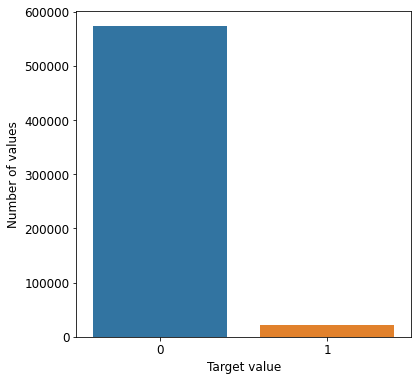

In [15]:
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
x = trainset['target'].value_counts().index.values
y = trainset['target'].value_counts().values

sns.barplot(ax=ax, x=x, y=y)
plt.ylabel('Number of values', fontsize=12)
plt.xlabel('Target value', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# real features

In [16]:
variable = metadata[(metadata.type == 'real') & (metadata.preserve)].index

In [17]:
trainset[variable].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [18]:
(pow(trainset['ps_car_12']*10,2)).head(10)
#ps_car_12 곱하기 10 값에 제곱

0    16.00
1    10.00
2    10.00
3    14.00
4     9.99
5    19.89
6    10.00
7    19.98
8    16.00
9    20.00
Name: ps_car_12, dtype: float64

In [19]:
(pow(trainset['ps_car_15'],2)).head(10)

0    13.0
1     6.0
2    11.0
3     4.0
4     4.0
5     9.0
6    10.0
7    11.0
8     8.0
9    13.0
Name: ps_car_15, dtype: float64

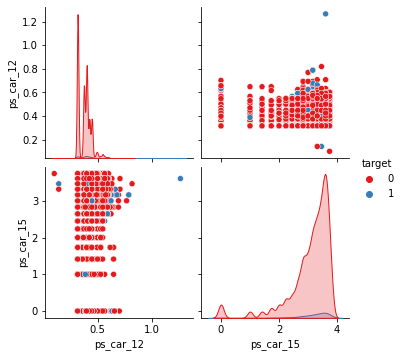

In [20]:
sample = trainset.sample(frac=0.05)
var = ['ps_car_12', 'ps_car_15', 'target']
sample = sample[var]
sns.pairplot(sample, hue='target', palette= 'Set1', diag_kind='kde')
plt.show() #그래프가 나오다 말았다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

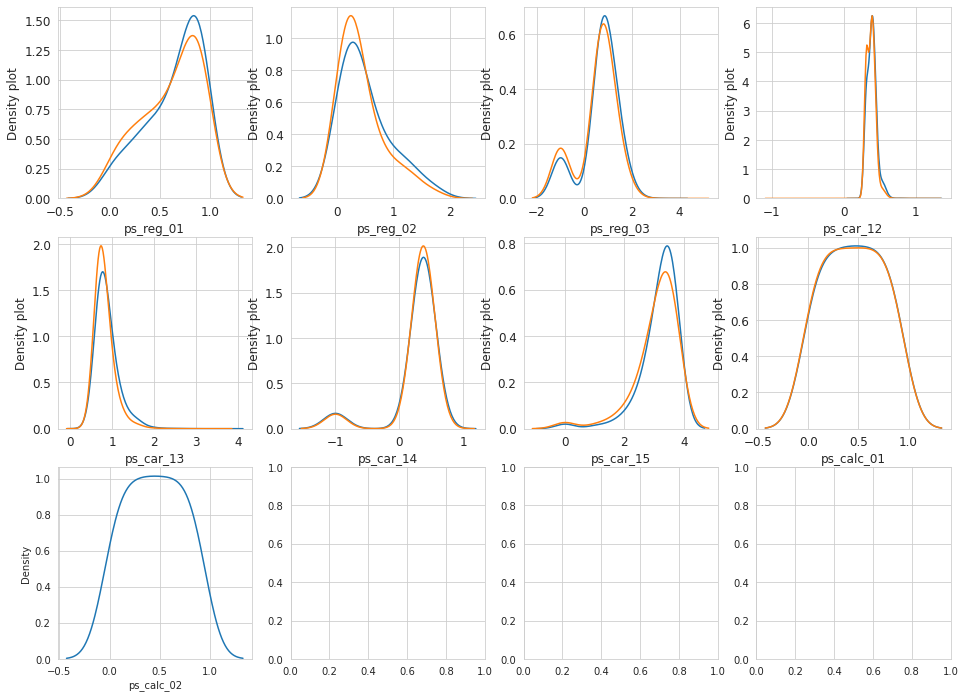

In [21]:
var = metadata[(metadata.type == 'real') & (metadata.preserve)].index
#var = [col for col in trainset.columns]
i = 0
t1 = trainset.loc[trainset['target'] != 0]
t0 = trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,4,figsize=(16,12))

for feature in var :
  i += 1
  plt.subplot(3,4,i)
  sns.kdeplot(t1[feature], bw=0.5, label = 'target = 1')
  sns.kdeplot(t0[feature], bw=0.5, label = 'target = 0')
  plt.ylabel('Density plot', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis='both', which = 'major', labelsize= 12)
plt.show();

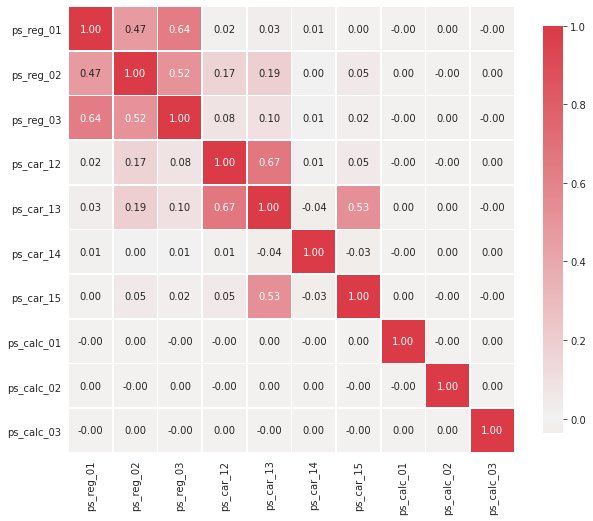

In [22]:
def corr_heatmap(var):
  correlations = trainset[var].corr()

  cmap = sns.diverging_palette(50,10,as_cmap = True)

  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap = cmap, vmax =1.0, center=0., fmt ='.2f',
              square = True, linewidths = .5, annot= True, cbar_kws = {'shrink':.75})
  plt.show();

var = metadata[(metadata.type == 'real') & (metadata.preserve)].index
corr_heatmap(var)

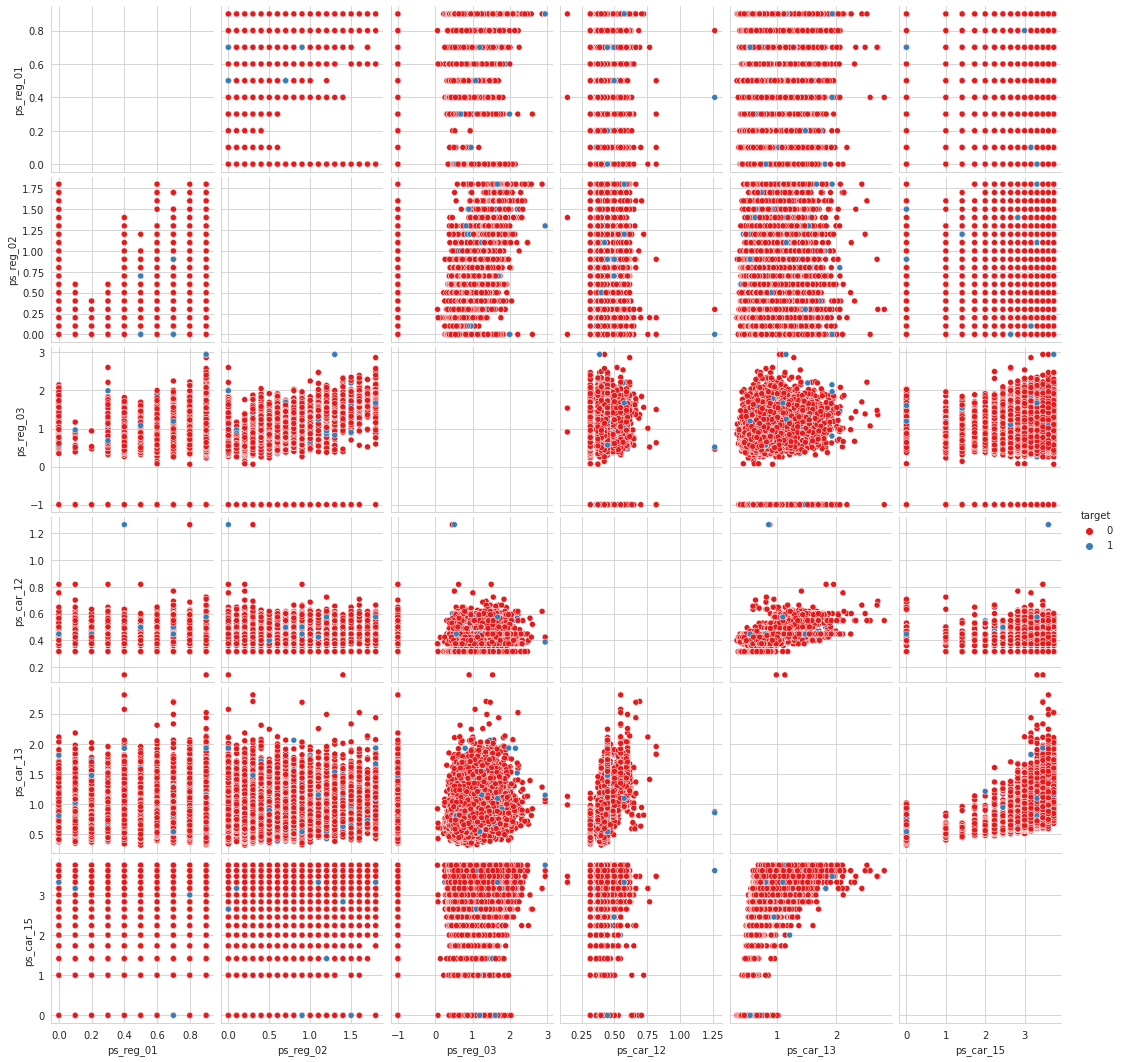

In [23]:
sample = trainset.sample(frac=0.05)
var = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12','ps_car_13','ps_car_15','target']
sample = sample[var]
sns.pairplot(sample, hue='target', palette='Set1', diag_kind ='kda')
plt.show()

# binary feature

In [24]:
v = metadata[(metadata.type == 'binary') & (metadata.preserve)].index #preserve가 뭐였더라
trainset[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f0aa3c35dd0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


<Figure size 432x288 with 0 Axes>

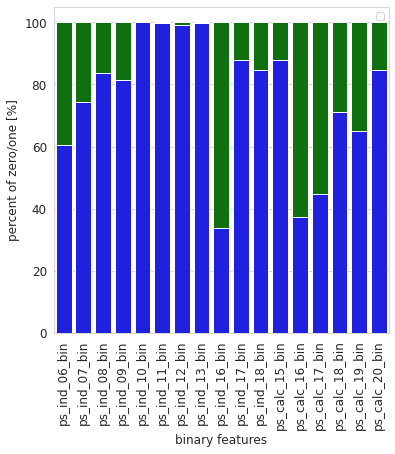

In [25]:
bin_col = [col for col in trainset.columns if '_bin' in col] #for -> if 문으로 해석하나? bin = [조건에 맞는 columns명]
zero_list = []
one_list = []
for col in bin_col :
  zero_list.append((trainset[col]==0).sum()/trainset.shape[0]*100) #(trainset[col] == 0).sum : 각 칼럼에서 0의 값을 가지는 개수를 모두 세라?
  one_list.append((trainset[col]==1).sum()/trainset.shape[0]*100) #*100 (퍼센트 표현) : 
plt.figure()

fig, ax = plt.subplots(figsize=(6,6))

p1 = sns.barplot(ax=ax, x=bin_col, y = zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom = zero_list, color='green')
plt.ylabel('percent of zero/one [%]', fontsize=12)
plt.xlabel('binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend((p1,p2), ('Zero', 'One'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

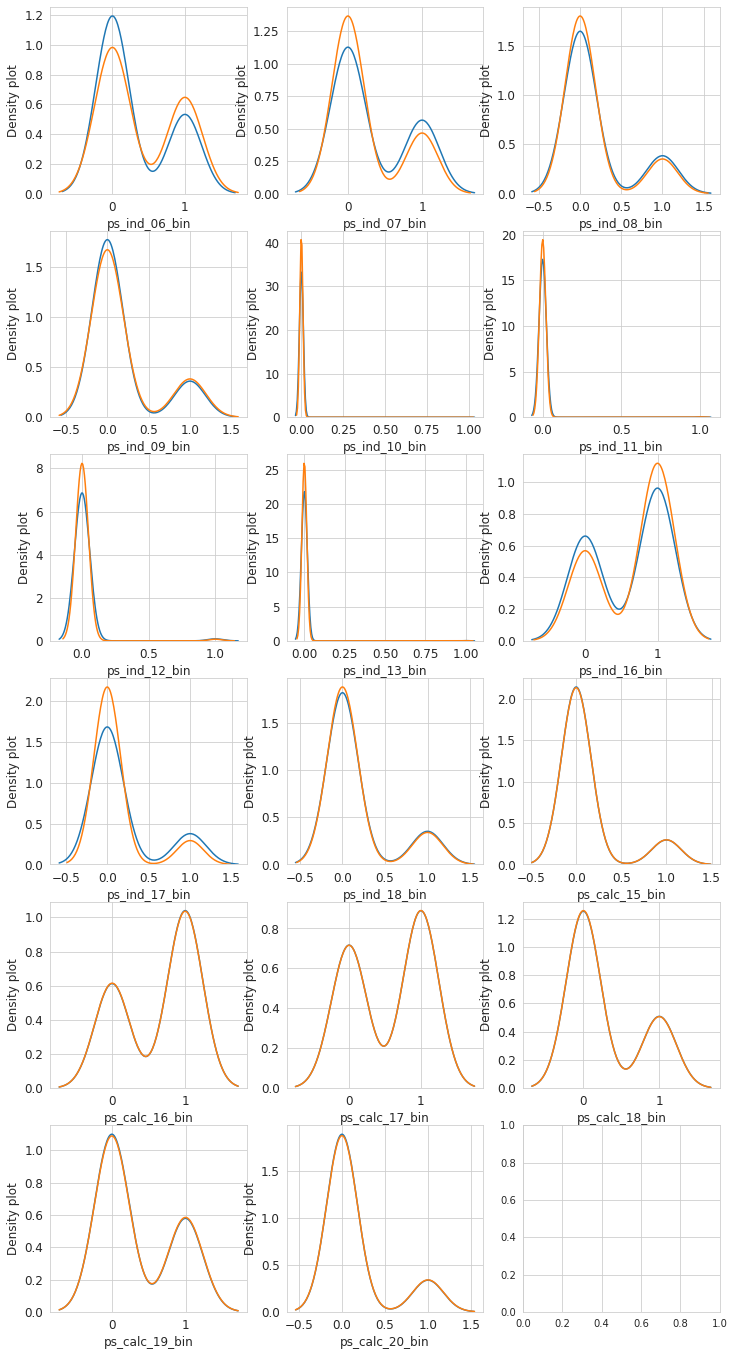

In [26]:
var = metadata[(metadata.type == 'binary') & (metadata.preserve)].index
var = [col for col in trainset.columns if '_bin' in col] #trainset.columns에서 col 중에 _bin을 포함하는 col을 모두 배열하라?
i = 0
t1 = trainset.loc[trainset['target'] != 0]
t0 = trainset.loc[trainset['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,3,figsize=(12,24))

for feature in var :
  i += 1
  plt.subplot(6,3,i)
  sns.kdeplot(t1[feature], bw = 0.5, label = 'target = 1')
  sns.kdeplot(t0[feature], bw = 0.5, label = 'target = 0')
  plt.ylabel('Density plot', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which='major', labelsize=12)
plt.show()

# categorical features

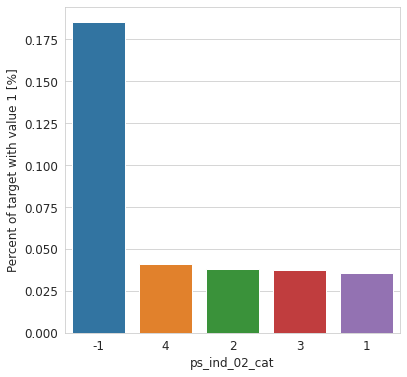

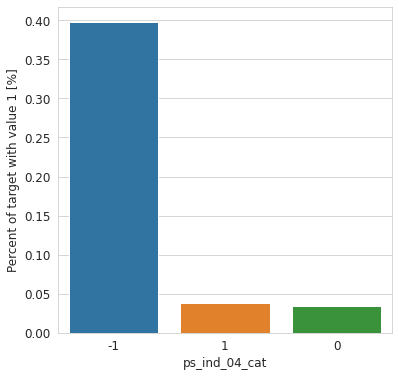

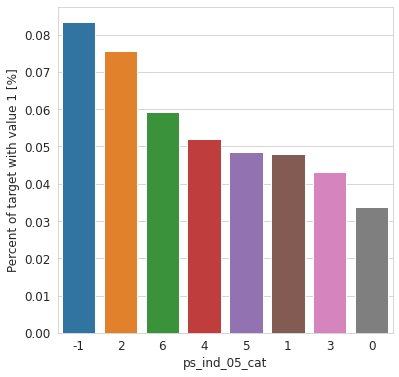

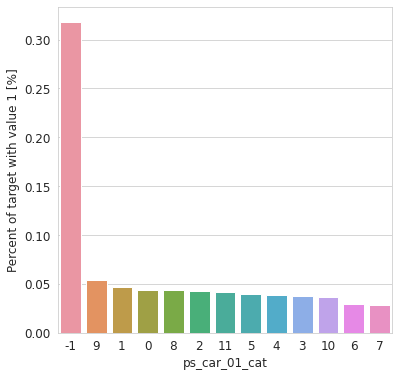

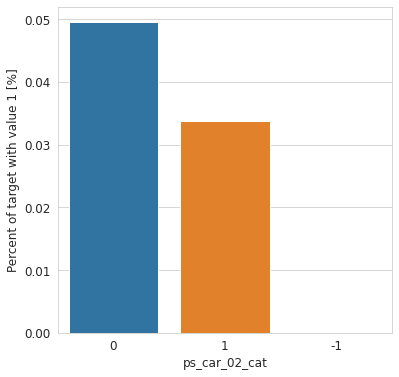

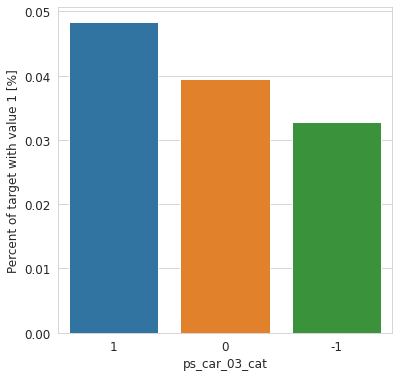

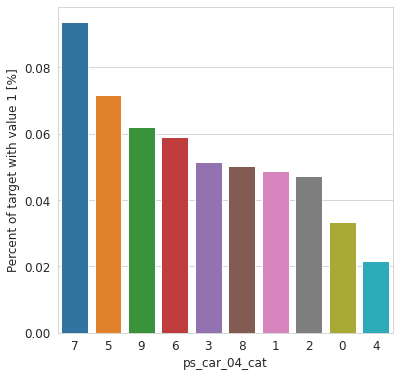

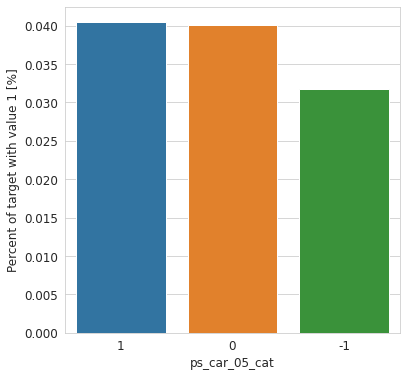

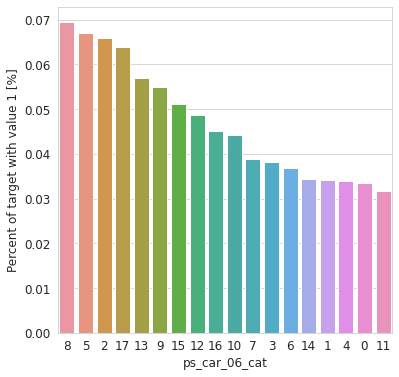

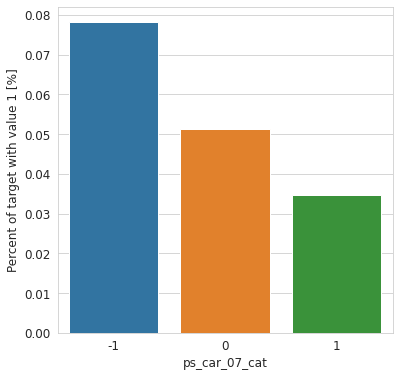

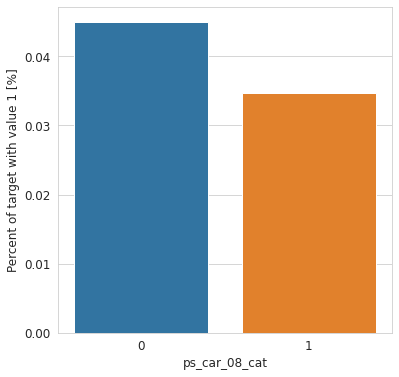

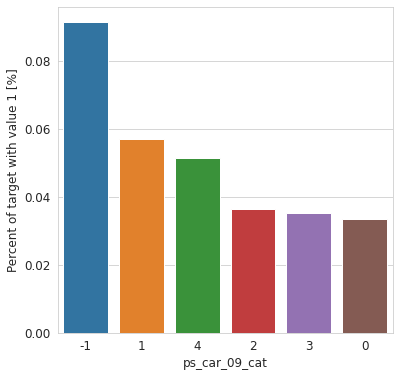

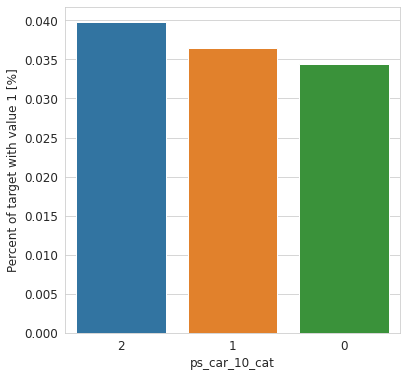

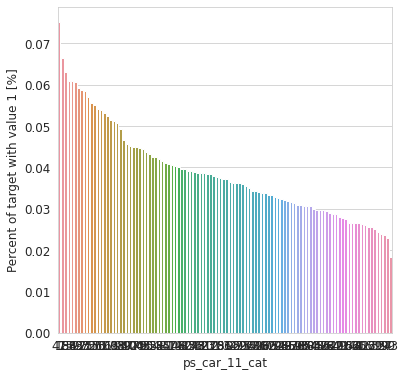

In [27]:
var = metadata[(metadata.type == 'categorical') & (metadata.preserve)].index

for feature in var:
  fig, ax = plt.subplots(figsize = (6,6))

  cat_perc = trainset[[feature, 'target']].groupby([feature], as_index=False).mean()
  cat_perc.sort_values(by='target', ascending=False, inplace=True)
  sns.barplot(ax=ax, x=feature, y='target', data=cat_perc, order=cat_perc[feature])
  plt.ylabel('Percent of target with value 1 [%]', fontsize = 12)
  plt.xlabel(feature, fontsize=12)
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

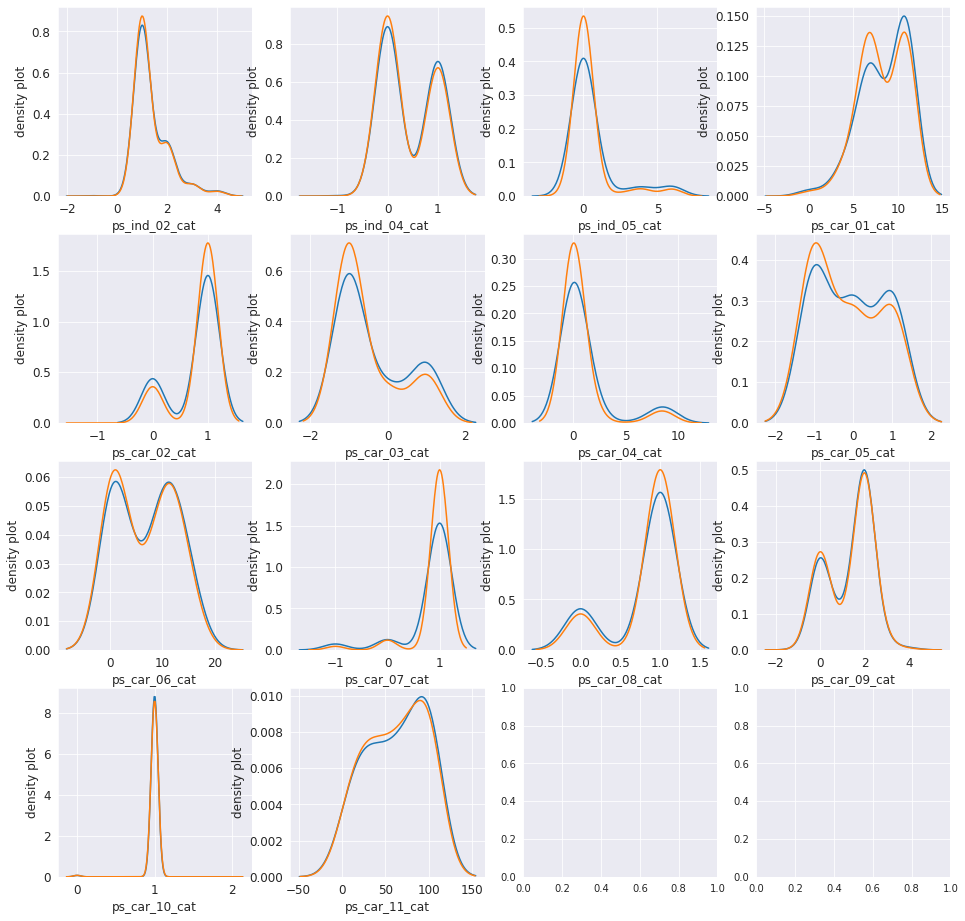

In [28]:
var = metadata[(metadata.type == 'categorical') & (metadata.preserve)].index
i = 0
t1 = trainset.loc[trainset['target'] != 0]
t0 = trainset.loc[trainset['target'] == 0]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(4,4,figsize=(16,16))

for feature in var:
  i += 1 
  plt.subplot(4,4,i) #(row, column, pos) pos : 몇번째에 그림을 그려넣을지(1,1) = 1 (4,4)=16
  sns.kdeplot(t1[feature], bw = 0.5, label = 'target = 1')
  sns.kdeplot(t0[feature], bw = 0.5, label = 'target = 0')
  plt.ylabel('density plot', fontsize = 12)
  plt.xlabel(feature, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

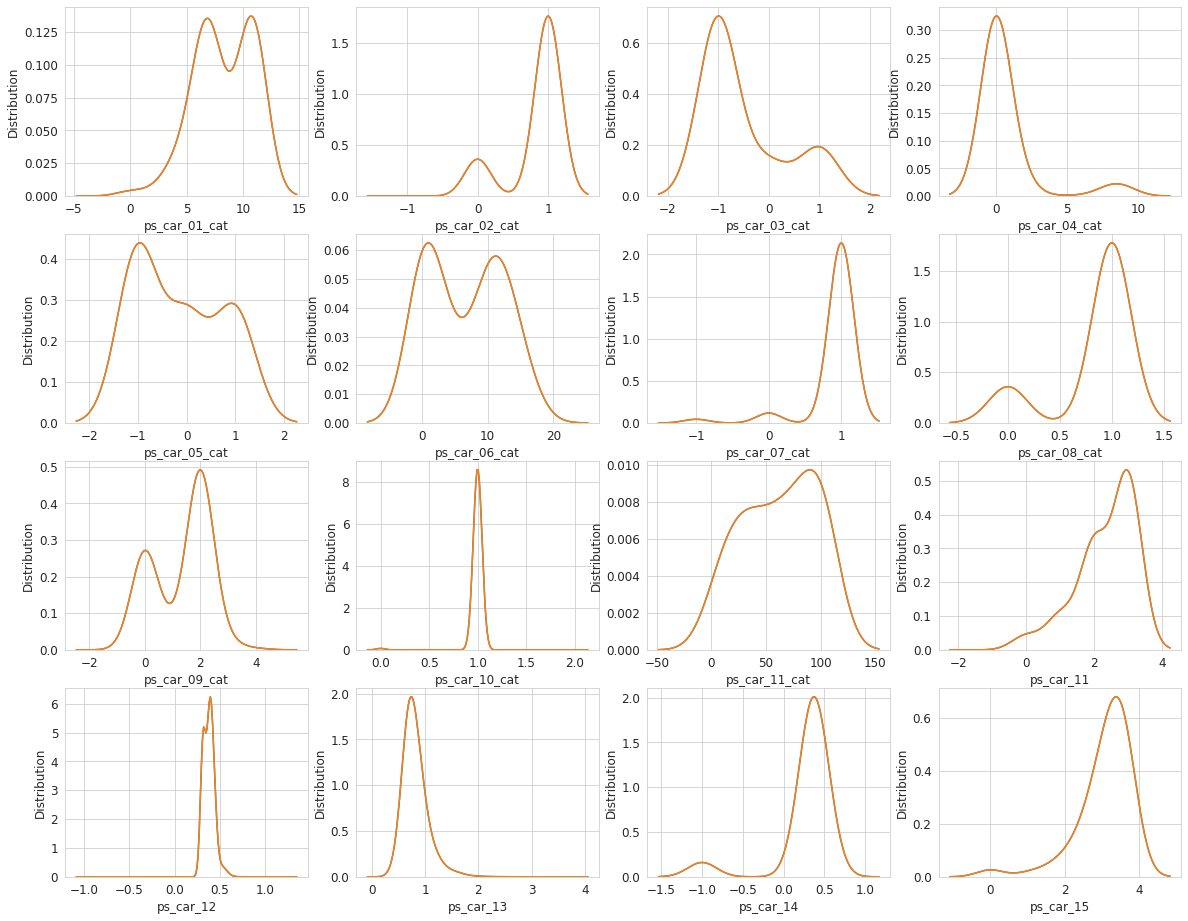

In [29]:
var =metadata[(metadata.category == 'car') & (metadata.preserve)].index

sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(4,4, figsize=(20,16))
i = 0
for feature in var:
  i += 1
  plt.subplot(4,4,i)
  sns.kdeplot(trainset[feature], bw=0.5, label='train')
  sns.kdeplot(trainset[feature], bw=0.5, label = 'test')
  plt.ylabel('Distribution', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which='major', labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

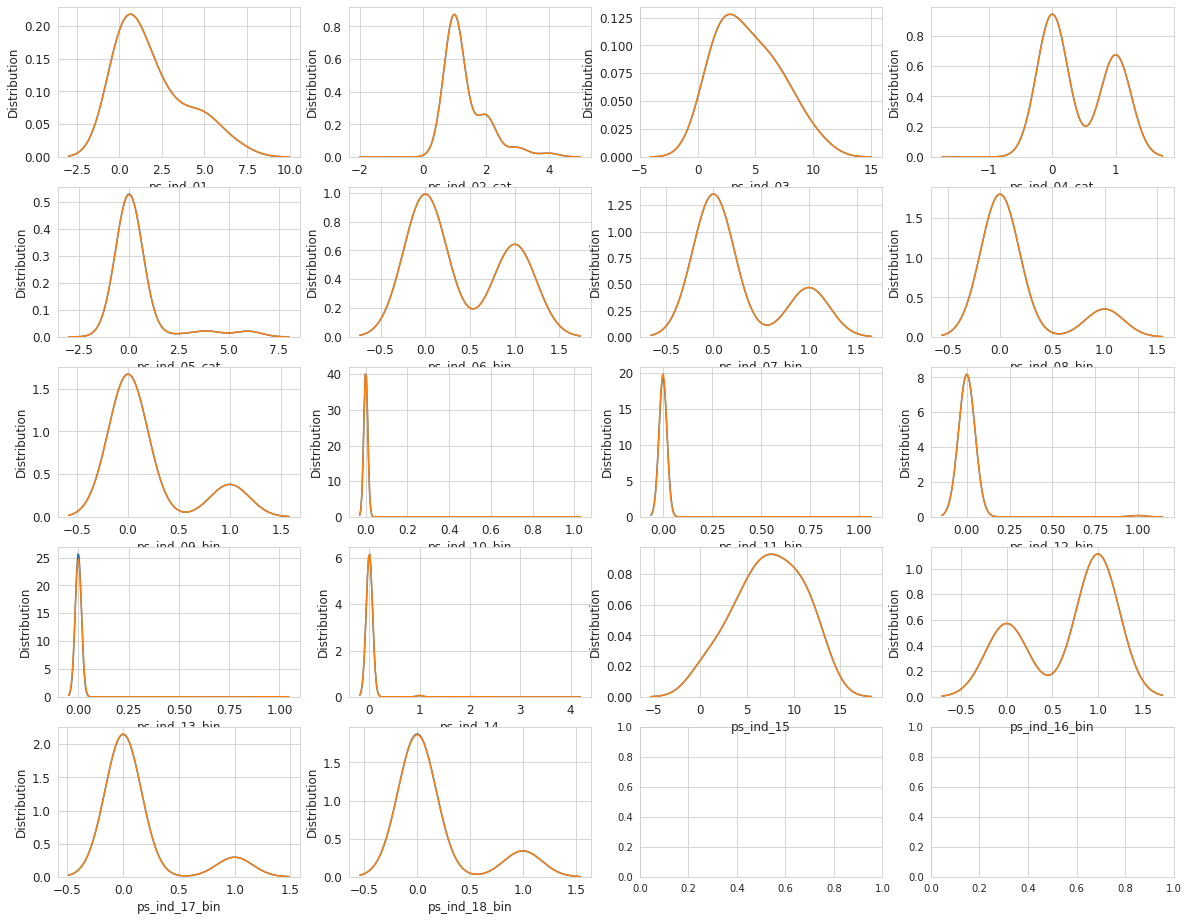

In [30]:
var = metadata[(metadata.category == 'individual') & (metadata.preserve)].index

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(20,16))
i = 0
for feature in var:
  i += 1
  plt.subplot(5,4,i)
  sns.kdeplot(trainset[feature], bw=0.5, label='train')
  sns.kdeplot(testset[feature], bw= 0.5, label='test')
  plt.ylabel('Distribution', fontsize=12)
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

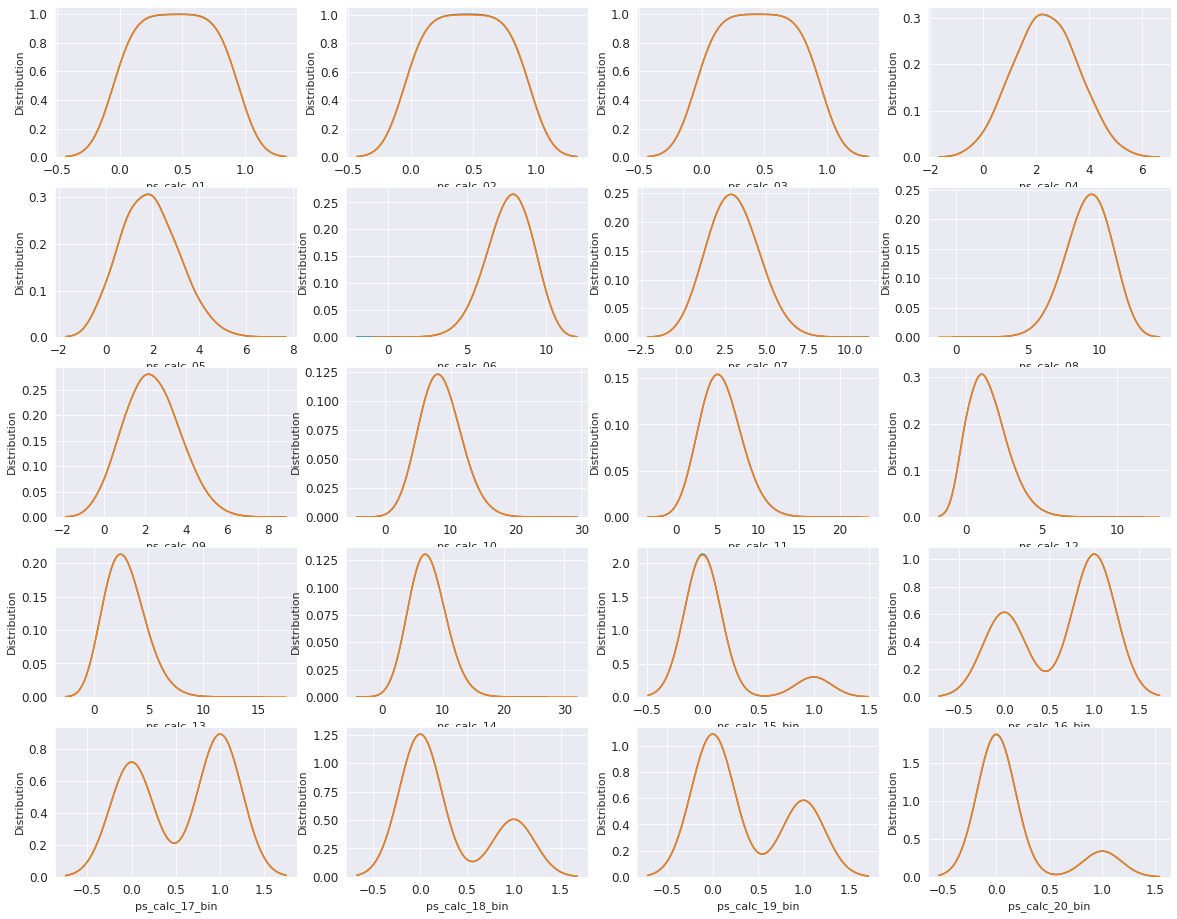

In [31]:
var = metadata[(metadata.category == 'calculated') & (metadata.preserve)].index

sns.set_style('darkgrid')
plt.figure()

fig, ax = plt.subplots(5,4, figsize=(20,16))
i = 0
for feature in var:
  i += 1
  plt.subplot(5,4,i)
  sns.kdeplot(trainset[feature], bw=0.5, label='train')
  sns.kdeplot(testset[feature], bw=0.5, label='test')
  plt.ylabel('Distribution', fontsize=11)
  plt.xlabel(feature, fontsize=11)
  locs, labels = plt.xticks()
  plt.tick_params(axis='both', which = 'major', labelsize=12)
plt.show()

#check data

In [32]:
vars_with_missing = []

for feature in trainset.columns:
  missings = trainset[trainset[feature] == -1][feature].count()
  if missings > 0 :
    vars_with_missing.append(feature)
    missings_percs = missings/trainset.shape[0]

    print('variable {} has {} records ({:.2%}) with missing values'.format(feature, missings, missings_percs) )

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

variable ps_ind_02_cat has 216 records (0.04%) with missing values
variable ps_ind_04_cat has 83 records (0.01%) with missing values
variable ps_ind_05_cat has 5809 records (0.98%) with missing values
variable ps_reg_03 has 107772 records (18.11%) with missing values
variable ps_car_01_cat has 107 records (0.02%) with missing values
variable ps_car_02_cat has 5 records (0.00%) with missing values
variable ps_car_03_cat has 411231 records (69.09%) with missing values
variable ps_car_05_cat has 266551 records (44.78%) with missing values
variable ps_car_07_cat has 11489 records (1.93%) with missing values
variable ps_car_09_cat has 569 records (0.10%) with missing values
variable ps_car_11 has 5 records (0.00%) with missing values
variable ps_car_12 has 1 records (0.00%) with missing values
variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


# prepare the data for model

In [33]:
col_to_drop = trainset.columns[trainset.columns.str.startswith('ps_calc_')]
trainset= trainset.drop(col_to_drop, axis=1)
testset = testset.drop(col_to_drop, axis=1)

In [38]:
print(trainset.columns)
print(testset.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15'],
      dtype='object')
Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bi

In [40]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
trainset.drop(vars_to_drop, inplace=True, axis=1)
testset.drop(vars_to_drop, inplace=True, axis=1)
metadata.loc[(vars_to_drop), 'keep'] = False

KeyError: ignored

In [41]:
def add_noise(series, noise_level):
  return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                  tst_series = None,
                  target = None,
                  min_samples_leaf= 1,
                  smoothing=1,
                  noise_level=0):

  assert len(trn_series) == len(target)
  assert trn_series.name == tst_series.name
  temp = pd.concat([trn_series, target], axis=1)
  #compute target mean
  averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])
  #compute smoothing
  smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf)/smoothing))
  #apply average function to all target data
  prior = target.mean()
  #The bigger the count the less full avg is taken into account
  averages[target.name] = prior * (1-smoothing) + averages['mean']*smoothing
  averages.drop(['mean','count'], axis=1,inplace=True)
  ft_trn_series = pd.merge(
      trn_series.to_frame(trn_series.name),
      averages.reset_index().rename(columns={'index':target.name, target.name : 'average'}),
      on=trn_series.name,
      how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  ft_trn_series.index = trn_series.index
  ft_tst_series = pd.merge(
      tst_series.to_frame(tst_series.name),
      averages.reset_index().rename(columns = {'index' : target.name, target.name : 'average'}),
      on=tst_series.name,
      how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  ft_tst_series.index = tst_series.index 
  return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)                    

#계산 왜케 빨라?

In [42]:
train_encoded, test_encoded = target_encode(trainset['ps_car_11_cat'],
                                            testset['ps_car_11_cat'],
                                            target = trainset.target,
                                            min_samples_leaf = 100,
                                            smoothing=10,
                                            noise_level=0.01)

trainset['ps_car_11_cat_te'] = train_encoded
trainset.drop('ps_car_11_cat', axis=1, inplace=True)
metadata.loc['ps_car_11_cat', 'keep'] = False
testset['ps_car_11_cat_te'] = test_encoded
testset.drop('ps_car_11_cat',axis=1, inplace=True)

In [43]:
desired_apriori = 0.10

idx_0 = trainset[trainset.target == 0].index
idx_1 = trainset[trainset.target == 1].index

nb_0 = len(trainset.loc[idx_0])
nb_1 = len(trainset.loc[idx_1])

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling : {}'.format(undersampled_nb_0))

undersampled_idx = shuffle(idx_0, random_state=314, n_samples = undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

trainset=trainset.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target=0 after undersampling : 195246


In [44]:
trainset = trainset.replace(-1, np.nan)
testset = testset.replace(-1, np.nan)

In [45]:
cat_features = [a for a in trainset.columns if a.endswith('cat')]

for column in cat_features:
  temp = pd.get_dummies(pd.Series(trainset[column]))
  trainset = pd.concat([trainset,temp], axis=1)
  trainset = trainset.drop([column], axis=1)

for column in cat_features:
  temp = pd.get_dummies(pd.Series(testset[column]))
  testset = pd.concat([testset, temp], axis=1)
  testset = testset.drop([column], axis=1)

## run 타임 끊겨서 여기서부턴 실행 못해봄

In [46]:
id_test = testset['id'].values
target_train = trainset['target'].values

trainset = trainset.drop(['target','id'], axis=1)
testset = testset.drop(['id'], axis=1)

In [47]:
print("Train dataset (rows, cols) :", trainset.values.shape,
      "\nTest dataset (rows, cols) : ", testset.values.shape)

Train dataset (rows, cols) : (216940, 91) 
Test dataset (rows, cols) :  (892816, 91)


In [57]:
class Ensemble(object):
  def __init__(self, n_splits, stacker, base_models):
    self.n_splits = n_splits
    self.stacker = stacker
    self.base_models = base_models

  def fit_predict(self, X,y, T):
    X = np.array(X)
    y = np.array(y)
    T = np.array(T)

    folds = list(StratifiedKFold(n_splits = self.n_splits, shuffle=True, random_state=314).split(X,y))

    S_train = np.zeros((X.shape[0], len(self.base_models)))
    S_test = np.zeros((T.shape[0], len(self.base_models)))
    for i, clf in enumerate(self.base_models):

      S_test_i = np.zeros((T.shape[0], self.n_splits))

      for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]

        print("Base model %d : fit %s model \ fold %d" % (i+1, str(clf).split('(')[0], j+1))
        clf.fit(X_train, y_train)
        cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
        print("cross_score [roc-auc] : %.5f [gini] : %.5f" %(cross_score.mean(), 2*cross_score.mean()-1))

        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res

In [58]:
#lightGBM params
lgb_params1 = {}
lgb_params1['learning_rate'] = 0.02
lgb_params1['n_estimators'] = 650
lgb_params1['max_bin'] = 10
lgb_params1['subsample'] = 0.8
lgb_params1['subsample_freq'] = 10
lgb_params1['colsample_bytree'] = 0.8
lgb_params1['min_child_samples'] = 500
lgb_params1['seed'] = 314
lgb_params1['num_threads'] = 4

lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaved'] = 16
lgb_params2['seed'] =  314
lgb_params2['num_threads'] = 4

lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] = 314
lgb_params3['num_threads'] = 4

xgb_params = {}
xgb_params['objective'] = 'binary:logistic'
xgb_params['learning_rate'] = 0.04
xgb_params['n_estimators'] = 490
xgb_params['max_depth'] = 4
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] = 0.9
xgb_params['min_child_weight'] = 10
xgb_params['num_thread'] = 4

In [59]:
lgb_model1 = LGBMClassifier(**lgb_params1)
lgb_model2 = LGBMClassifier(**lgb_params2)
lgb_model3 = LGBMClassifier(**lgb_params3)
xgb_model = XGBClassifier(**xgb_params)

log_model = LogisticRegression()

In [60]:
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
stack = Ensemble(n_splits=3,
                 stacker = log_model,
                 base_models = (lgb_model1, lgb_model2, lgb_model3, xgb_model))

#앙상블 학습이란 여러 개의 분류기를 생성하고 그 예측을 결합해 보다 정확한 예측을 도출하는 기법이다
#lgb_model 1,2,3, xgb_model, log_model이 분류기

In [62]:
y_prediction = stack.fit_predict(trainset, target_train, testset)

Base model 1 : fit LGBMClassifier model \ fold 1
cross_score [roc-auc] : 0.63706 [gini] : 0.27412
